In [1]:
from perses.analysis import utils
from openmmtools.multistate import MultiStateReporter, MultiStateSamplerAnalyzer
from simtk import unit
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from perses.analysis import utils

from openmmtools.constants import kB
KT_KCALMOL = kB * 298 * unit.kelvin / unit.kilocalories_per_mole

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Given a path, get dg and ddg
def analyze(path):
    reporter = MultiStateReporter(path)
    analyzer = MultiStateSamplerAnalyzer(reporter)
    f_ij, df_ij = analyzer.get_free_energy()
    f = f_ij[0,-1] # units = kT
#     f = f_ij[0,-1] * analyzer.kT
#     dg = f.in_units_of(unit.kilocalories_per_mole)
    df = df_ij[0, -1]
#     df = df_ij[0, -1] * analyzer.kT
#     ddg = df.in_units_of(unit.kilocalories_per_mole)
    return f, df

def analyze_dom(path, n_iterations=None):
    reporter = MultiStateReporter(path)
    ncfile = utils.open_netcdf(path)
    if not n_iterations:
        n_iterations = ncfile.variables['last_iteration'][0]
    print(f"n_iterations: {n_iterations}")
    dg, ddg = list(), list()
#     iterations_to_analyze = list(range (1, n_iterations, 500)) + [int(n_iterations-1)]
#     print(iterations_to_analyze) # check that this is giving me the last avail iteration
#     for step in iterations_to_analyze: 
#         analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=step)
#         f_ij, df_ij = analyzer.get_free_energy()
#         dg.append(f_ij[0,-1])
#         ddg.append(df_ij[0,-1])
    # Get final free energy
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=n_iterations)
    f_ij, df_ij = analyzer.get_free_energy()
    dg.append(f_ij[0,-1])
    ddg.append(df_ij[0,-1])
    return np.array(dg), np.array(ddg)

### 5 ns N501Y with away conformation (naked charges not fixed) (repex/31/27/0)

In [3]:
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

In [4]:
main_dir = 31
sub_dir = 27
titles = ['N501Y']

In [5]:
for r in tqdm_notebook([0]):
    print (f"replicate {r}")
    output_dir = f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/'
    
    print("analyzing complex")
    complex_path = os.path.join(output_dir, f"{r}_complex.nc")
    complex_dg, complex_ddg = analyze_dom(complex_path)
    print("analyzing apo")
    apo_path = os.path.join(output_dir, f"{r}_apo.nc")
    apo_dg, apo_ddg = analyze_dom(apo_path)

    results = np.array([complex_dg, complex_ddg, apo_dg, apo_ddg])
    with open(f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy', 'wb') as f:
        np.save(f, results)

  0%|          | 0/1 [00:00<?, ?it/s]

replicate 0
analyzing complex
n_iterations: 10000


analyzing apo
n_iterations: 10000


In [6]:
# Read the dicts in and compute free energies (kcal/mol)
d_results = {}
for r in [0]:
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy", "rb") as f:
        results = np.load(f, allow_pickle=True)
        d_results[r] = results
        complex_dg, complex_ddg, apo_dg, apo_ddg = [result[-1]*KT_KCALMOL for result in results]
        print(f"{r} complex: {complex_dg} ({complex_ddg}) kcal/mol")
        print(f"{r} apo: {apo_dg} ({apo_ddg}) kcal/mol")
        binding_dg = complex_dg - apo_dg
        binding_ddg = (apo_ddg**2 + complex_ddg**2)**0.5
        print(f"{r} DDG: {binding_dg} ({binding_ddg}) kcal/mol")
        print()



0 complex: 71.59507571499462 (0.6628070838447454) kcal/mol
0 apo: 66.72370324147617 (0.16191528953482037) kcal/mol
0 DDG: 4.8713724735184485 (0.68229743615224) kcal/mol



### 5 ns N501Y (repex/31/28/0) -- normal set up with naked charges fixed

In [11]:
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

In [12]:
main_dir = 31
sub_dir = 28
titles = ['N501Y']

In [13]:
for r in tqdm_notebook([0]):
    print (f"replicate {r}")
    output_dir = f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/'
    
    print("analyzing complex")
    complex_path = os.path.join(output_dir, f"{r}_complex.nc")
    complex_dg, complex_ddg = analyze_dom(complex_path)
    print("analyzing apo")
    apo_path = os.path.join(output_dir, f"{r}_apo.nc")
    apo_dg, apo_ddg = analyze_dom(apo_path)

    results = np.array([complex_dg, complex_ddg, apo_dg, apo_ddg])
    with open(f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy', 'wb') as f:
        np.save(f, results)

  0%|          | 0/1 [00:00<?, ?it/s]

replicate 0
analyzing complex
n_iterations: 7964


analyzing apo
n_iterations: 10000


In [14]:
# Read the dicts in and compute free energies (kcal/mol)
d_results = {}
for r in [0]:
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy", "rb") as f:
        results = np.load(f, allow_pickle=True)
        d_results[r] = results
        complex_dg, complex_ddg, apo_dg, apo_ddg = [result[-1]*KT_KCALMOL for result in results]
        print(f"{r} complex: {complex_dg} ({complex_ddg}) kcal/mol")
        print(f"{r} apo: {apo_dg} ({apo_ddg}) kcal/mol")
        binding_dg = complex_dg - apo_dg
        binding_ddg = (apo_ddg**2 + complex_ddg**2)**0.5
        print(f"{r} DDG: {binding_dg} ({binding_ddg}) kcal/mol")
        print()



0 complex: 68.04479427872356 (0.41006910406105485) kcal/mol
0 apo: 65.81226777601047 (0.12879962224462946) kcal/mol
0 DDG: 2.2325265027130854 (0.4298209078160292) kcal/mol



In [14]:
# Generate replica mixing plots
titles = ['N501Y']
for r in [0]:
    print (f"replicate {r} complex")
    path = f"/data/chodera/zhangi/perses_benchmark/repex/31/28/{r}/{r}_complex.nc"
    utils.plot_replica_mixing(path, title=f"{titles[r]} complex replicate {r}", filename=f"{path[:-3]}_replicas.png")
    plt.clf()


replicate 0 complex


<Figure size 1080x3456 with 0 Axes>

In [3]:
import os
import pickle
import logging 
from openmmtools.multistate import MultiStateReporter
import tqdm
import numpy as np

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
import matplotlib.transforms as transforms


In [125]:
out_dir = "/data/chodera/zhangi/perses_benchmark/repex/31/28/0/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'complex'
aa = 'ASN'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [126]:
reporter = MultiStateReporter(os.path.join(out_dir, f"0_{phase}.nc"), 'r')


In [127]:
states = range(24)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [128]:
# Note this was edited to work for swap-neighbors (there can be nans)
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(0, 7964):
        acceptance_rate_raw = reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j]
        if not np.isnan(acceptance_rate_raw):
            acceptance_rates.append(acceptance_rate_raw)
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 23/23 [11:46<00:00, 30.73s/it]


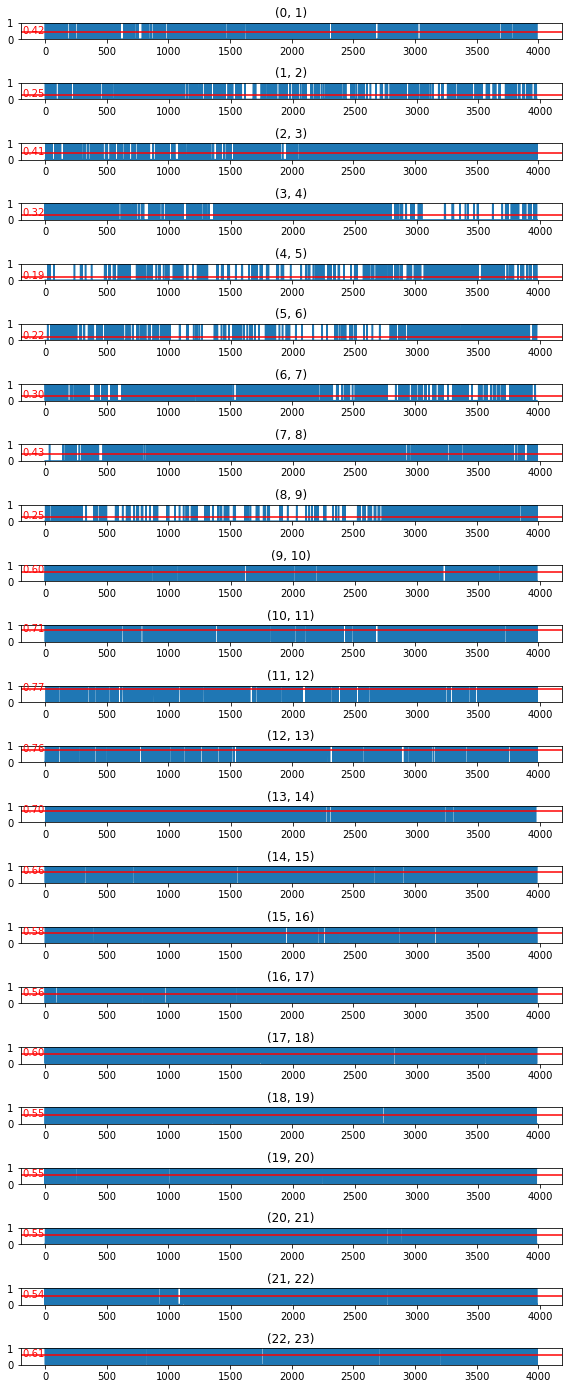

In [129]:
cols = 1
rows = 24
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()


### 5 ns N501Y (repex/31/29/0) -- away conformations with naked charges fixed and multiphase protocol

In [7]:
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

In [8]:
main_dir = 31
sub_dir = 29
titles = ['N501Y']

In [9]:
for r in tqdm_notebook([0]):
    print (f"replicate {r}")
    output_dir = f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/'
    
    print("analyzing complex")
    complex_path = os.path.join(output_dir, f"{r}_complex.nc")
    complex_dg, complex_ddg = analyze_dom(complex_path)
    print("analyzing apo")
    apo_path = os.path.join(output_dir, f"{r}_apo.nc")
    apo_dg, apo_ddg = analyze_dom(apo_path)

    results = np.array([complex_dg, complex_ddg, apo_dg, apo_ddg])
    with open(f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy', 'wb') as f:
        np.save(f, results)

  0%|          | 0/1 [00:00<?, ?it/s]

replicate 0
analyzing complex
n_iterations: 2892


analyzing apo
n_iterations: 10000


In [10]:
# Read the dicts in and compute free energies (kcal/mol)
d_results = {}
for r in [0]:
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy", "rb") as f:
        results = np.load(f, allow_pickle=True)
        d_results[r] = results
        complex_dg, complex_ddg, apo_dg, apo_ddg = [result[-1]*KT_KCALMOL for result in results]
        print(f"{r} complex: {complex_dg} ({complex_ddg}) kcal/mol")
        print(f"{r} apo: {apo_dg} ({apo_ddg}) kcal/mol")
        binding_dg = complex_dg - apo_dg
        binding_ddg = (apo_ddg**2 + complex_ddg**2)**0.5
        print(f"{r} DDG: {binding_dg} ({binding_ddg}) kcal/mol")
        print()



0 complex: 74.25682935662655 (0.40789093979279184) kcal/mol
0 apo: 68.84116973184122 (0.15771225108043424) kcal/mol
0 DDG: 5.415659624785334 (0.43731930314806006) kcal/mol



In [ ]:
# Generate replica mixing plots
titles = ['N501Y']
for r in [0]:
    print (f"replicate {r} complex")
    path = f"/data/chodera/zhangi/perses_benchmark/repex/31/28/{r}/{r}_complex.nc"
    utils.plot_replica_mixing(path, title=f"{titles[r]} complex replicate {r}", filename=f"{path[:-3]}_replicas.png")
    plt.clf()


### 10 ns N501Y (repex/31/30/0) normal set up with naked charges fixed and multiphase protocol

In [15]:
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)


In [16]:
main_dir = 31
sub_dir = 30
titles = ['N501Y']

In [13]:
output_dir = f'/data/chodera/zhangi/perses_benchmark/repex/31/30/0/'
apo_path = os.path.join(output_dir, f"0_complex.nc")
reporter = MultiStateReporter(apo_path)
ncfile = utils.open_netcdf(apo_path)
analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=400)
# f_ij, df_ij = analyzer.get_free_energy()

In [83]:
reporter.read_energies()[1].T.shape

(11, 11, 10001)

In [85]:
analyzer.reformat_energies_for_mbar(reporter.read_energies()[1].T)

(11, 110011)

In [100]:
from pymbar import MBAR, timeseries

mbar = MBAR(analyzer.reformat_energies_for_mbar(reporter.read_energies()[1].T), np.repeat([10001], 11), initial_f_k=None)

In [104]:
mbar.getFreeEnergyDifferences()[0][0, -1]

0.0

In [112]:
W = np.exp(analyzer.mbar.Log_W_nk)

In [113]:
W.shape

(1564, 36)

In [114]:
analyzer.mbar.N_k

array([ 0, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46,  0])

In [115]:
tolerance = 1.0e-4
column_sums = np.sum(W, axis=0)
badcolumns = (np.abs(column_sums - 1) > tolerance)

In [116]:
for i, value in enumerate(W[:,0]):
    print(i, value)

0 6.178302359550802e-05
1 6.4192522414572554e-09
2 0.0002810281762744142
3 1.514197548454225e-11
4 6.383221165349347e-05
5 4.860550602408867e-05
6 0.0019605144766897493
7 6.279127071668385e-07
8 2.5852565213908737e-06
9 0.003005594926757146
10 0.00038667459507366503
11 1.7436988846008622e-06
12 0.00030932458055109806
13 1.1787675326018452e-07
14 0.0005525278743108891
15 0.00010319731845501427
16 6.822316079962138e-14
17 2.3247496273964924e-12
18 0.00018415383245527664
19 1.9866291334739576e-11
20 8.237875375889676e-09
21 5.10306777202096e-05
22 3.091834386249421e-08
23 3.0105383079059754e-06
24 1.7572699199512074e-09
25 1.2832095974092918e-08
26 5.29100406597922e-06
27 0.0025400427868045986
28 7.093576913975163e-11
29 6.894887108504907e-07
30 1.4351352046133976e-08
31 2.794566181622938e-07
32 8.982598238648781e-08
33 2.891981382151113e-07
34 5.974175674053399e-07
35 2.2344452938407325e-09
36 1.0025882833097628e-06
37 2.433626734748653e-09
38 5.43328679755821e-06
39 1.4082076085453008e-

706 5.245802267858702e-82
707 0.0
708 0.0
709 8.333041693048077e-66
710 0.0
711 0.0
712 0.0
713 1.892293422794752e-21
714 0.0
715 4.119001561182841e-307
716 4.9041708671600854e-111
717 0.0
718 4.668447616950511e-269
719 8.143243929766409e-120
720 3.77254070407067e-155
721 0.0
722 6.751223101744913e-132
723 0.0
724 0.0
725 1.624103407233871e-250
726 0.0
727 0.0
728 3.706659261986274e-85
729 1.476766113150892e-48
730 9.911402919301191e-285
731 1.2770764352502464e-26
732 0.0
733 0.0
734 0.0
735 0.0
736 0.0
737 0.0
738 0.0
739 0.0
740 0.0
741 3.171411664306671e-149
742 1.74567113357385e-309
743 8.066848366399398e-31
744 0.0
745 0.0
746 0.0
747 7.76709782956538e-83
748 2.2387407680052256e-210
749 0.0
750 1.443e-321
751 2.0820827279481962e-67
752 1.0122588565004285e-158
753 0.0
754 7.63654569138493e-191
755 3.21133679630645e-253
756 0.0
757 2.802283190616217e-163
758 0.0
759 0.0
760 0.0
761 0.0
762 1.3274537802324182e-128
763 0.0
764 1.5175696160589294e-104
765 0.0
766 0.0
767 0.0
768 4.3438

In [17]:
for r in tqdm_notebook([0]):
    print (f"replicate {r}")
    output_dir = f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/'
    
    print("analyzing complex")
    complex_path = os.path.join(output_dir, f"{r}_complex.nc")
    complex_dg, complex_ddg = analyze_dom(complex_path)
    print("analyzing apo")
    apo_path = os.path.join(output_dir, f"{r}_apo.nc")
    apo_dg, apo_ddg = analyze_dom(apo_path)

    results = np.array([complex_dg, complex_ddg, apo_dg, apo_ddg])
    with open(f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy', 'wb') as f:
        np.save(f, results)

  0%|          | 0/1 [00:00<?, ?it/s]

replicate 0
analyzing complex
n_iterations: 9051


analyzing apo
n_iterations: 10000


In [18]:
complex_dg *KT_KCALMOL

array([73.38821318])

In [19]:
# Read the dicts in and compute free energies (kcal/mol)
d_results = {}
for r in [0]:
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy", "rb") as f:
        results = np.load(f, allow_pickle=True)
        d_results[r] = results
        complex_dg, complex_ddg, apo_dg, apo_ddg = [result[-1]*KT_KCALMOL for result in results]
        print(f"{r} complex: {complex_dg} ({complex_ddg}) kcal/mol")
        print(f"{r} apo: {apo_dg} ({apo_ddg}) kcal/mol")
        binding_dg = complex_dg - apo_dg
        binding_ddg = (apo_ddg**2 + complex_ddg**2)**0.5
        print(f"{r} DDG: {binding_dg} ({binding_ddg}) kcal/mol")
        print()



0 complex: 73.38821317706683 (0.3550359241621616) kcal/mol
0 apo: 64.67126130659862 (0.12402108932200305) kcal/mol
0 DDG: 8.716951870468208 (0.37607411243303684) kcal/mol



In [17]:
# Generate replica mixing plots
titles = ['N501Y']
for r in [0]:
    print (f"replicate {r} complex")
    path = f"/data/chodera/zhangi/perses_benchmark/repex/31/30/{r}/{r}_complex.nc"
    utils.plot_replica_mixing(path, title=f"{titles[r]} complex replicate {r}", filename=f"{path[:-3]}_replicas.png")
    plt.clf()


replicate 0 complex


<Figure size 1080x4896 with 0 Axes>

In [4]:
import os
import pickle
import logging 
from openmmtools.multistate import MultiStateReporter
import tqdm
import numpy as np

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
import matplotlib.transforms as transforms


In [5]:
out_dir = "/data/chodera/zhangi/perses_benchmark/repex/31/30/0/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'complex'
aa = 'ASN'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [6]:
reporter = MultiStateReporter(os.path.join(out_dir, f"0_{phase}.nc"), 'r')


DEBUG:openmmtools.multistate.multistatereporter:Initial checkpoint file automatically chosen as /data/chodera/zhangi/perses_benchmark/repex/31/30/0/0_complex_checkpoint.nc
DEBUG:openmmtools.multistate.multistatereporter:checkpoint_interval != on-file checkpoint interval! Using on file analysis interval of 10.
DEBUG:openmmtools.multistate.multistatereporter:analysis_particle_indices != on-file analysis_particle_indices!Using on file analysis indices of [    0     1     2 ... 16295 16296 16297]


In [7]:
states = range(34)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [8]:
# Note this was edited to work for swap-neighbors (there can be nans)
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(0, 8400):
        acceptance_rate_raw = reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j]
        if not np.isnan(acceptance_rate_raw):
            acceptance_rates.append(acceptance_rate_raw)
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 33/33 [10:44<00:00, 19.54s/it]


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sc

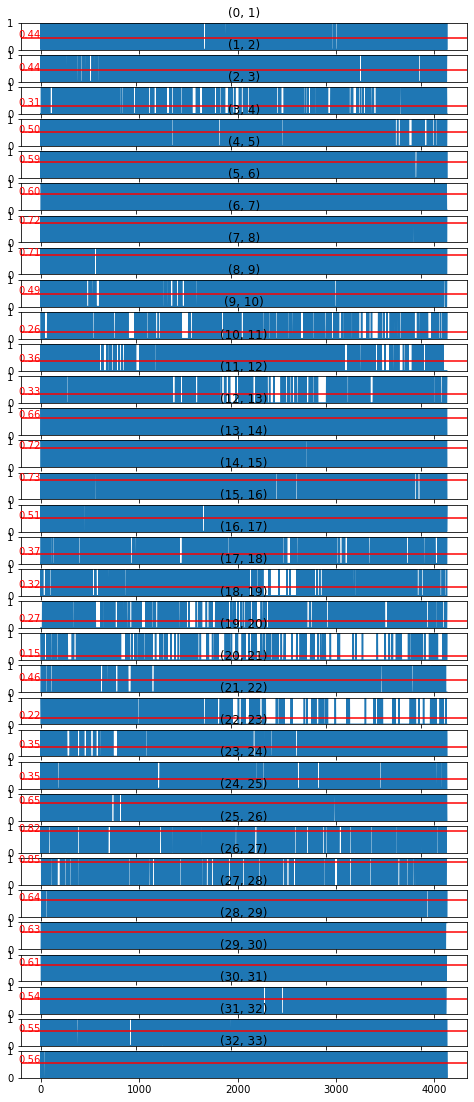

In [9]:
cols = 1
rows = 34
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

# This one is from default lambda schedule and 34 replicas

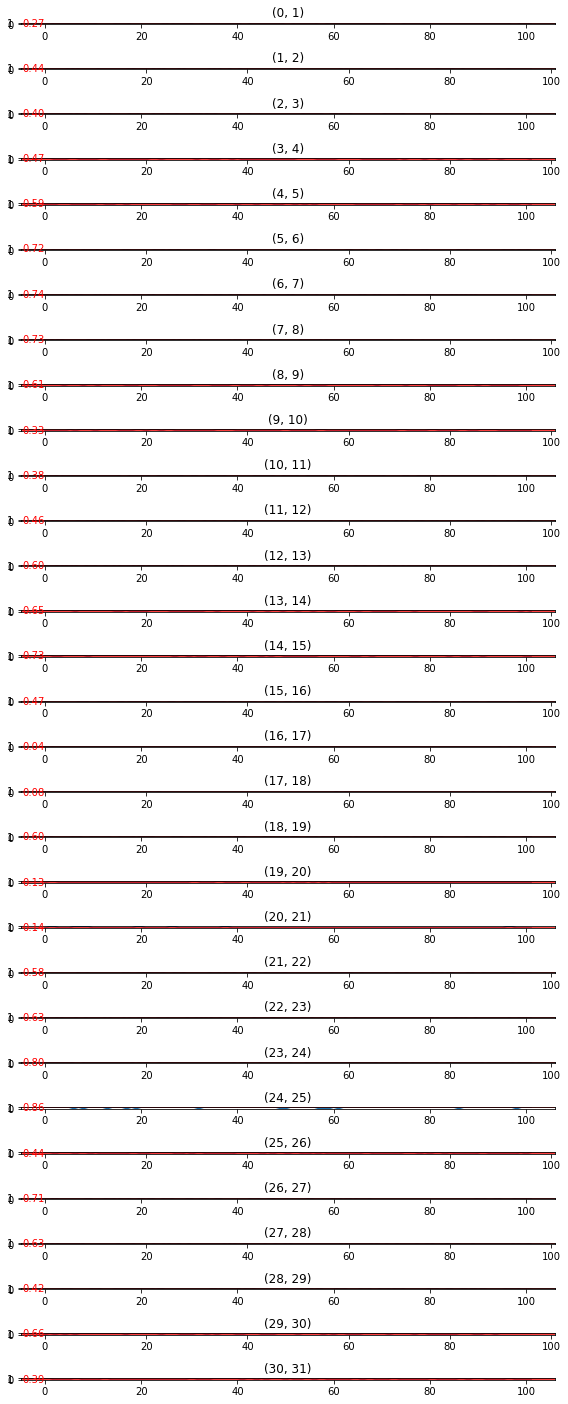

In [19]:
# cols = 1
# rows = 32
# plt.figure(figsize=(8, 20))
# gs = plt.GridSpec(rows, cols)
# for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
#     plt.subplot(gs[i,0])
#     plt.plot(acceptance_rates)
#     plt.title(pair)
#     plt.ylim([0, 1])
#     mean = np.mean(acceptance_rates)
#     plt.axhline(y=mean, color="red")

# #     trans = transforms.blended_transform_factory(
# #         plt.yticks()[0].get_transform(), plt.transData)
#     plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
#             ha="right", va="center")
# plt.tight_layout()
# plt.show()

# This one is from default lambda schedule and 32 replicas

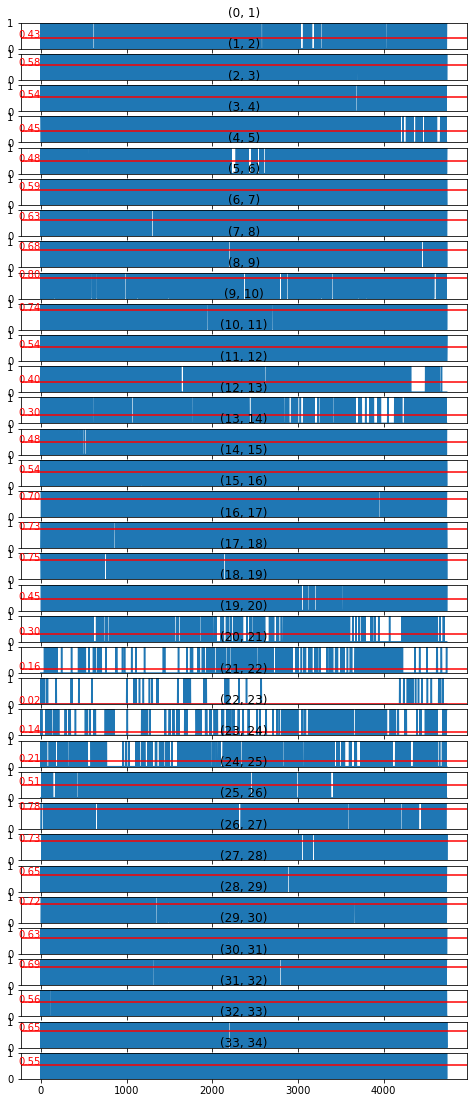

In [13]:
# cols = 1
# rows = 35
# plt.figure(figsize=(8, 20))
# gs = plt.GridSpec(rows, cols)
# for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
#     plt.subplot(gs[i,0])
#     plt.plot(acceptance_rates)
#     plt.title(pair)
#     plt.ylim([0, 1])
#     mean = np.mean(acceptance_rates)
#     plt.axhline(y=mean, color="red")

# #     trans = transforms.blended_transform_factory(
# #         plt.yticks()[0].get_transform(), plt.transData)
#     plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
#             ha="right", va="center")
# plt.tight_layout()
# plt.show()

# This one is from default lambda schedule and 35 replicas

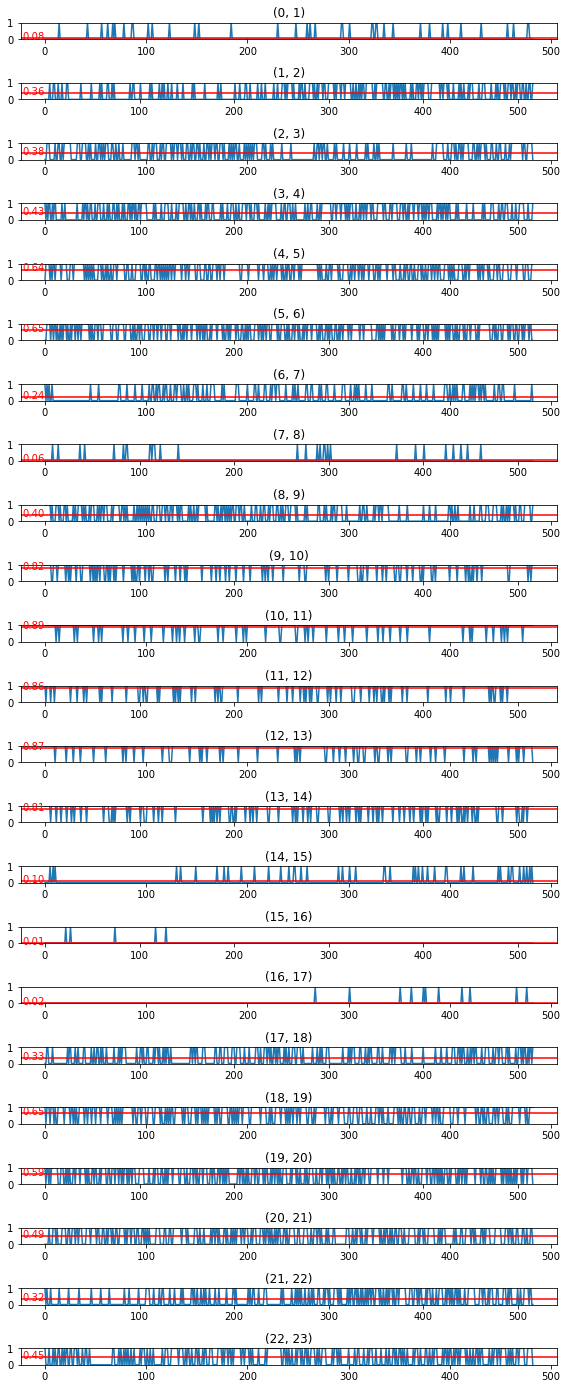

In [54]:
# cols = 1
# rows = 24
# plt.figure(figsize=(8, 20))
# gs = plt.GridSpec(rows, cols)
# for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
#     plt.subplot(gs[i,0])
#     plt.plot(acceptance_rates)
#     plt.title(pair)
#     plt.ylim([0, 1])
#     mean = np.mean(acceptance_rates)
#     plt.axhline(y=mean, color="red")

# #     trans = transforms.blended_transform_factory(
# #         plt.yticks()[0].get_transform(), plt.transData)
#     plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
#             ha="right", va="center")
# plt.tight_layout()
# plt.show()

# This one is from default lambda schedule and 24 replicas

### 10 ns N501A (repex/31/31/0)

In [3]:
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

In [4]:
main_dir = 31
sub_dir = 31
titles = ['N501A']

In [5]:
for r in tqdm_notebook([0]):
    print (f"replicate {r}")
    output_dir = f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/'
    
    print("analyzing complex")
    complex_path = os.path.join(output_dir, f"{r}_complex.nc")
    complex_dg, complex_ddg = analyze_dom(complex_path)
    print("analyzing apo")
    apo_path = os.path.join(output_dir, f"{r}_apo.nc")
    apo_dg, apo_ddg = analyze_dom(apo_path)

    results = np.array([complex_dg, complex_ddg, apo_dg, apo_ddg])
    with open(f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy', 'wb') as f:
        np.save(f, results)

  0%|          | 0/1 [00:00<?, ?it/s]

replicate 0
analyzing complex
n_iterations: 7040


analyzing apo
n_iterations: 10000


In [6]:
# Read the dicts in and compute free energies (kcal/mol)
d_results = {}
for r in [0]:
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy", "rb") as f:
        results = np.load(f, allow_pickle=True)
        d_results[r] = results
        complex_dg, complex_ddg, apo_dg, apo_ddg = [result[-1]*KT_KCALMOL for result in results]
        print(f"{r} complex: {complex_dg} ({complex_ddg}) kcal/mol")
        print(f"{r} apo: {apo_dg} ({apo_ddg}) kcal/mol")
        binding_dg = complex_dg - apo_dg
        binding_ddg = (apo_ddg**2 + complex_ddg**2)**0.5
        print(f"{r} DDG: {binding_dg} ({binding_ddg}) kcal/mol")
        print()



0 complex: 80.56880602227127 (0.40307024846805267) kcal/mol
0 apo: 76.7122948463223 (0.1789361189311396) kcal/mol
0 DDG: 3.856511175948981 (0.4410031290798702) kcal/mol



### 10 ns A501Y (repex/31/32/0)

In [7]:
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

In [8]:
main_dir = 31
sub_dir = 32

In [9]:
for r in tqdm_notebook([0]):
    print (f"replicate {r}")
    output_dir = f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/'
    
    print("analyzing complex")
    complex_path = os.path.join(output_dir, f"{r}_complex.nc")
    complex_dg, complex_ddg = analyze_dom(complex_path)
    print("analyzing apo")
    apo_path = os.path.join(output_dir, f"{r}_apo.nc")
    apo_dg, apo_ddg = analyze_dom(apo_path)

    results = np.array([complex_dg, complex_ddg, apo_dg, apo_ddg])
    with open(f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy', 'wb') as f:
        np.save(f, results)

  0%|          | 0/1 [00:00<?, ?it/s]

replicate 0
analyzing complex


n_iterations: 7258


analyzing apo
n_iterations: 10000


In [10]:
# Read the dicts in and compute free energies (kcal/mol)
d_results = {}
for r in [0]:
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy", "rb") as f:
        results = np.load(f, allow_pickle=True)
        d_results[r] = results
        complex_dg, complex_ddg, apo_dg, apo_ddg = [result[-1]*KT_KCALMOL for result in results]
        print(f"{r} complex: {complex_dg} ({complex_ddg}) kcal/mol")
        print(f"{r} apo: {apo_dg} ({apo_ddg}) kcal/mol")
        binding_dg = complex_dg - apo_dg
        binding_ddg = (apo_ddg**2 + complex_ddg**2)**0.5
        print(f"{r} DDG: {binding_dg} ({binding_ddg}) kcal/mol")
        print()



0 complex: -7.754886164894782 (0.3485203454484424) kcal/mol
0 apo: -10.956314585756045 (0.1027036610897398) kcal/mol
0 DDG: 3.201428420861263 (0.36333796002171004) kcal/mol



### 10 ns K484E (repex/31/8/0)

In [14]:
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

In [17]:
main_dir = 31
sub_dir = 8

In [18]:
for r in tqdm_notebook([0]):
    print (f"replicate {r}")
    output_dir = f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/'
    
    print("analyzing complex")
    complex_path = os.path.join(output_dir, f"{r}_complex.nc")
    complex_dg, complex_ddg = analyze_dom(complex_path)
    print("analyzing apo")
    apo_path = os.path.join(output_dir, f"{r}_apo.nc")
    apo_dg, apo_ddg = analyze_dom(apo_path)

    results = np.array([complex_dg, complex_ddg, apo_dg, apo_ddg])
    with open(f'/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy', 'wb') as f:
        np.save(f, results)

  0%|          | 0/1 [00:00<?, ?it/s]

replicate 0
analyzing complex
n_iterations: 10000


analyzing apo
n_iterations: 10000


In [19]:
# Read the dicts in and compute free energies (kcal/mol)
d_results = {}
for r in [0]:
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/{main_dir}/{sub_dir}/{r}/results.npy", "rb") as f:
        results = np.load(f, allow_pickle=True)
        d_results[r] = results
        complex_dg, complex_ddg, apo_dg, apo_ddg = [result[-1]*KT_KCALMOL for result in results]
        print(f"{r} complex: {complex_dg} ({complex_ddg}) kcal/mol")
        print(f"{r} apo: {apo_dg} ({apo_ddg}) kcal/mol")
        binding_dg = complex_dg - apo_dg
        binding_ddg = (apo_ddg**2 + complex_ddg**2)**0.5
        print(f"{r} DDG: {binding_dg} ({binding_ddg}) kcal/mol")
        print()



0 complex: -227.12082165605312 (0.705428772647102) kcal/mol
0 apo: -225.75281689512838 (0.43596270355033) kcal/mol
0 DDG: -1.368004760924748 (0.8292727127822969) kcal/mol

